# Exercise: Iris Dataset
Now that you have a good understanding of exploritory data analysis and it's importance, it's time to put your knowledge to a more practical example. We'll be focusing on a iris public dataset from the scikit-learn library.

Our main objectives for this dataset are:
1. Load the iris dataset into a pandas dataframe
2. Create a table summary of the features and target values
3. Create a histogram of all the features and target
4. Create a correlation matrix of the features and target
5. Create scatter plots of all the features and target

In [1]:
import pandas as pd
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# Load in the iris dataset
iris = datasets.load_iris()

In [3]:
# For clarity, the iris dataset is a dictionary with the data and target separated
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# Create the iris `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Include the target as well
df['target'] = iris.target

In [5]:
# Loading iris dataset, use `as_frame=True` to return it as a dataframe
iris = datasets.load_iris(as_frame=True)

In [6]:
# For clarity, the iris dataset is a dictionary with the data and target separated
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
# Create the iris dataset as a dataframe, it'll be the `frame` key
df = iris.frame

In [8]:
# Check your dataframe by `.head()`
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# Simple table summary
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Axes: >

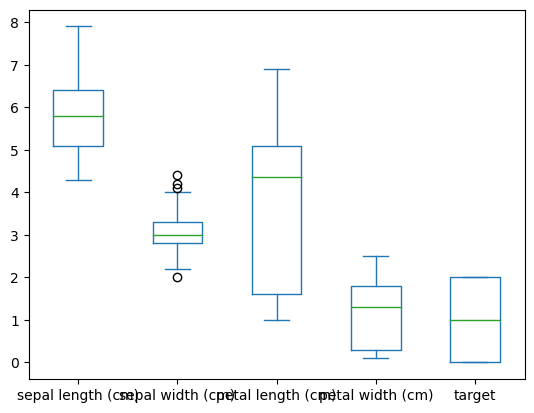

In [10]:
# Histogram to show all the data distributions including the target
df.plot.box()

In [11]:
# Investigate to see if any data are correlated positively or negatively
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


# Scatter Plot Of Features
Create a scatter plot of the four features against eachother to visualize the results from the correlation matrix
1. `sepal length (cm)` vs. `sepal width (cm)`
2. `sepal length (cm)` vs. `petal length (cm)`
3. `sepal length (cm)` vs. `petal width (cm)`
4. `sepal width (cm)` vs. `petal length (cm)`
5. `sepal width (cm)` vs. `petal width (cm)`
6. `petal length (cm)` vs. `petal width (cm)`

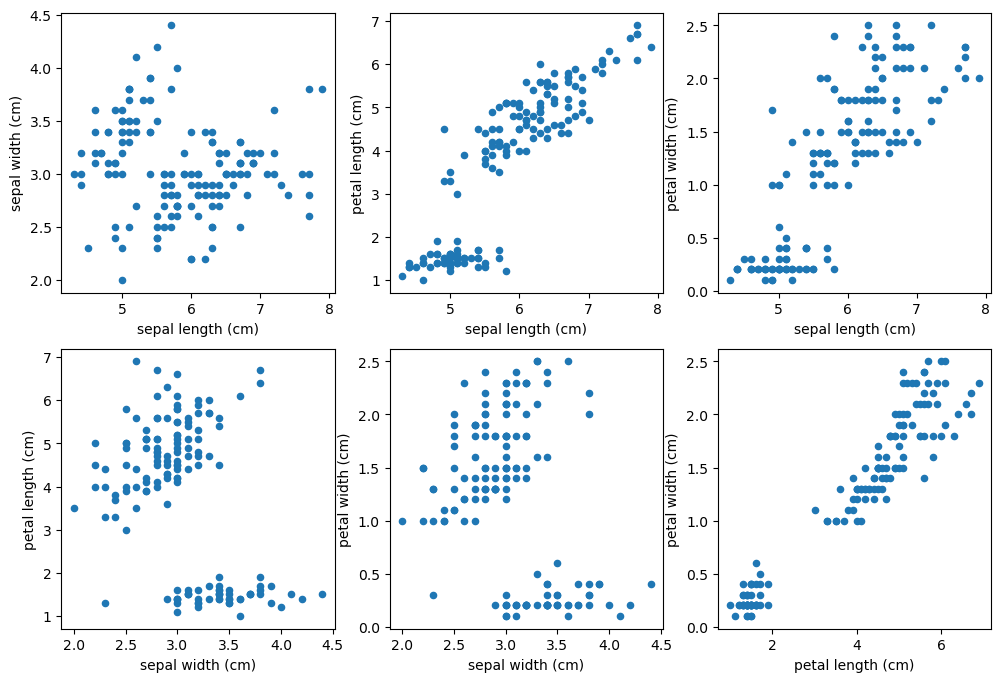

In [54]:
from itertools import combinations

combination_list = list(combinations(df.columns[:-1], 2))
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

y = 0
for i, comb in enumerate(combination_list):
    limit = 3
    modulo_x = i % limit
    next_y = i % (limit + 1)
    
    if next_y == limit:
        y += 1
    
    df.plot(ax=axes[y, modulo_x], x=comb[0], y=comb[1], kind="scatter")

# Scatter Plot Of Features And Target
Create a scatter plot of the four features against the target
1. `sepal length (cm)`
2. `sepal width (cm)`
3. `petal length (cm)`
4. `petal width (cm)`

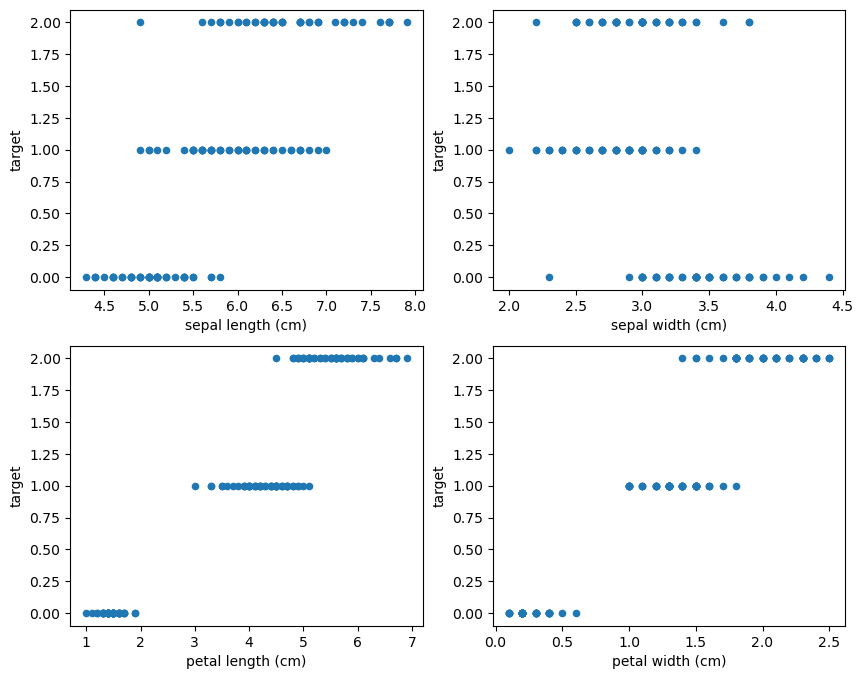

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

target_col = df.columns[-1]
feature_cols = df.columns[:-1]

combination_list = list(zip(feature_cols, [target_col] * len(feature_cols)))

y = 0
for i, comb in enumerate(combination_list):
    limit = 2
    modulo_x = i % limit
    next_y = i % (limit + 1)
    
    if next_y == limit:
        y += 1
    
    df.plot(ax=axes[y, modulo_x], x=comb[0], y=comb[1], kind="scatter")

# END OF NOTEBOOK